In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = h5py.File('/home/c_capzw/c_cape3d/latent_states_embeddings_and_images_depth.h5', 'r')

In [9]:
# Initialize lists to store shapes
shapes = []

# Traverse through all groups and collect shapes of joints_2d
for obj_root in f.keys():
    for action in f[obj_root].keys():
        path = f"{obj_root}/{action}"
        for obj in f[path].keys():
            path = f"{obj_root}/{action}/{obj}"
            print(path)
            shape = f[f"{path}/joints_2ds"].shape[1]
            shapes.append(shape)

# Calculate statistics
if shapes:
    min_shape = min(shapes)
    max_shape = max(shapes)
    avg_shape = sum(shapes) / len(shapes)

    print(f"Minimum shape[0]: {min_shape}")
    print(f"Maximum shape[0]: {max_shape}")
    print(f"Average shape[0]: {avg_shape}")
    print(f"Total number of sorted_indices: {len(shapes)}")
    # Calculate median and mode
    median_shape = np.median(shapes)
    mode_shape = max(set(shapes), key=shapes.count)

    print(f"Median shape[0]: {median_shape}")
    print(f"Mode shape[0]: {mode_shape}")
    # Count shapes less than 30
    count_less_than_30 = sum(1 for shape in shapes if shape < 20)
    print(f"Number of shapes less than 30: {count_less_than_30}")
else:
    print("No sorted_indices found in the file structure")


00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/000
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/001
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/002
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/003
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/is_joints_inside_3d


KeyError: 'Unable to synchronously open object (message type not found)'

In [4]:
def print_structure(name, obj):
    print(name)
f.visititems(print_structure)
print(f.__len__())

00064e6f6eec4fd7acf27091b8de4d70
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/000
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/000/embeddings
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/000/extrinsics
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/000/joints_2ds
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/000/latent_means
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/000/latent_stds
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/001
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/001/embeddings
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/001/extrinsics
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/001/joints_2ds
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/001/latent_means
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/001/latent_stds
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/002
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/002/embeddings
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/002/extrinsics
00064e6f6eec4fd7acf27091b8de4d70/mixamo.com/002/joints_2ds
00064e

In [10]:
raw = f['003f76fbaedf4074b877fcac7f8d52b7/metarig|FullCenter']
print(raw)
print("\nMembers:")
for key in raw.keys():
    print(raw.get(key))

<HDF5 group "/003f76fbaedf4074b877fcac7f8d52b7/metarig|FullCenter" (6 members)>

Members:
<HDF5 group "/003f76fbaedf4074b877fcac7f8d52b7/metarig|FullCenter/000" (4 members)>
<HDF5 group "/003f76fbaedf4074b877fcac7f8d52b7/metarig|FullCenter/001" (4 members)>
<HDF5 group "/003f76fbaedf4074b877fcac7f8d52b7/metarig|FullCenter/002" (4 members)>
<HDF5 group "/003f76fbaedf4074b877fcac7f8d52b7/metarig|FullCenter/003" (4 members)>
<HDF5 dataset "joints_2d": shape (132, 28, 2), type "<f8">
<HDF5 dataset "sorted_indices": shape (1, 28), type "<i8">


In [ ]:
# Create a new h5 file with the reorganized structure
import re

with h5py.File('data/reorganized_latent_states.h5', 'w') as new_f:
    # Copy data with reorganized structure
    for obj_root in f.keys():
        for action in f[obj_root].keys():
            src_path = f"{obj_root}/{action}"
            pattern = r'^(\d+)_(.+)$'
            
            # Create the base group structure
            if obj_root not in new_f:
                new_f.create_group(obj_root)
            if action not in new_f[obj_root]:
                new_f[obj_root].create_group(action)
            
            # Copy all datasets
            for key in f[src_path].keys():
                match = re.match(pattern, key)
                if match:
                    number, dataset_name = match.groups()
                    # Create number group if it doesn't exist
                    if number not in new_f[f"{obj_root}/{action}"]:
                        new_f[f"{obj_root}/{action}"].create_group(number)
                    # Copy dataset to new location
                    f.copy(f"{src_path}/{key}", 
                          new_f[f"{obj_root}/{action}/{number}"],
                          name=dataset_name)
                else:
                    # Copy regular datasets directly
                    f.copy(f"{src_path}/{key}", 
                          new_f[f"{obj_root}/{action}"],
                          name=key)

In [9]:
view = raw.get("000")
print(view)
print("\nMembers:")
for key in view.keys():
    print(view.get(key))

<HDF5 group "/003f76fbaedf4074b877fcac7f8d52b7/metarig|FullCenter/000" (4 members)>

Members:
<HDF5 dataset "embeddings": shape (33, 1, 1024), type "<f2">
<HDF5 dataset "extrinsics": shape (33, 3, 4), type "<f8">
<HDF5 dataset "latent_means": shape (33, 4, 32, 32), type "<f2">
<HDF5 dataset "latent_stds": shape (33, 4, 32, 32), type "<f2">


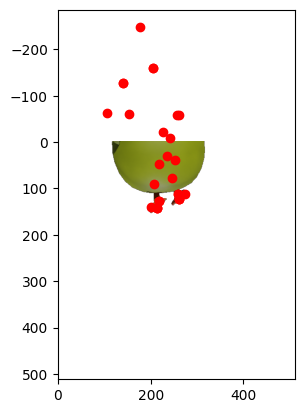

(512, 512, 4)


In [8]:
pos = 60
joints_2d_data = raw.get("joints_2d")[pos]
rendered_data = raw.get("rendered")[pos]
# Double all coordinates
joints_2d_data = joints_2d_data * 2
plt.imshow(rendered_data)
plt.scatter(joints_2d_data[:, 0], joints_2d_data[:, 1], c='r', marker='o')
plt.show()
print(rendered_data.shape)

In [72]:
joints_2d = raw.get("joints_2d")
valid_mask = ((joints_2d[..., 0] >= 0) & (joints_2d[..., 0] <= 512) & 
              (joints_2d[..., 1] >= 0) & (joints_2d[..., 1] <= 512))
print(valid_mask.shape)
valid_indices = np.where(valid_mask.any(axis=1))[0]
print(valid_indices)

(396, 28)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 291 292 293
 294 295 296 297 298 299 300 301 302 303 

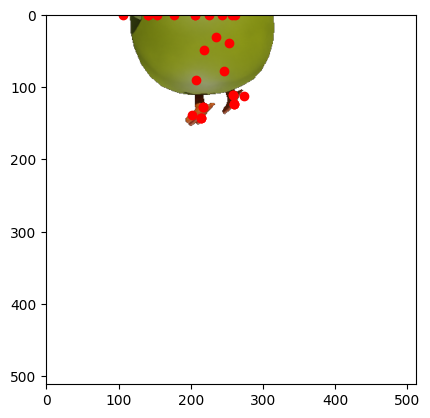

In [73]:
clipped_joints_2d_data = joints_2d_data.copy()
clipped_joints_2d_data[:, 1] = np.clip(clipped_joints_2d_data[:, 1], 0, 512)

plt.clf()
plt.imshow(rendered_data)
plt.scatter(clipped_joints_2d_data[:, 0], clipped_joints_2d_data[:, 1], c='r', marker='o')
plt.show()

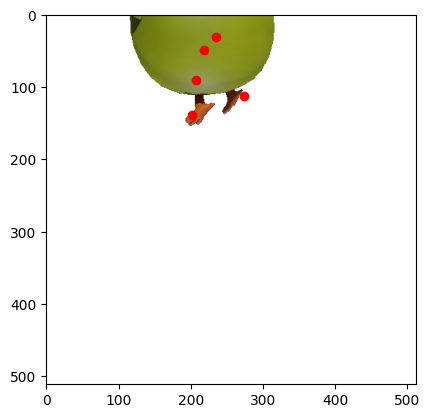

In [103]:
# Calculate valid scores for each joint
valid_scores = ((joints_2d_data[:, 0] >= 0) & (joints_2d_data[:, 0] <= 512) & 
                (joints_2d_data[:, 1] >= 0) & (joints_2d_data[:, 1] <= 512))

# Add small random noise to break ties
scores_with_noise = valid_scores.astype(float) + np.random.random(valid_scores.shape) * 1e-6

# Get indices of top num_max_drags scores
selected_indices = np.argsort(scores_with_noise)[-num_max_drags:]
new_joints_2d_data = joints_2d_data[selected_indices]

plt.clf()
plt.imshow(rendered_data)
plt.scatter(new_joints_2d_data[:, 0], new_joints_2d_data[:, 1], c='r', marker='o')
plt.show()


In [7]:
# Number of frames to sample
num_frames = 14

# Extract the joints_2d data
joints_2d_data = raw.get("joints_2d")

# Randomly select a starting index
start_index = np.random.randint(0, joints_2d_data.shape[0] - num_frames + 1)
# Get consecutive frames
indices = np.arange(start_index, start_index + num_frames)
sampled_joints_2d = joints_2d_data[indices]

# Reshape to [num_points, num_frames, 2]
reshaped_joints_2d = sampled_joints_2d.transpose(1, 0, 2)

print(reshaped_joints_2d.shape)

(12, 14, 2)


In [6]:
roots = list(f.keys())

In [8]:
obj_action_tuples = []
for obj_idx, obj_root in enumerate(roots):
    for action in list(f[obj_root].keys()):
        obj_action_tuples.append((obj_idx, action))

In [9]:
index = 0
obj_idx, action = obj_action_tuples[index % len(obj_action_tuples)]

In [10]:
obj_root = roots[obj_idx]
obj = f[f"{obj_root}/{action}"]
print(obj.keys())

<KeysViewHDF5 ['embedding', 'joints_2d', 'latent_means', 'latent_stds', 'rendered', 'sorted_indices']>


In [11]:
sorted_indices = obj.get("sorted_indices")
print(sorted_indices[:])

[[10  9  4  6  2  3  7  5  1  8 11  0]]


In [21]:
joints_2d = obj["joints_2d"][indices]
embedding = obj["embedding"][indices]
latent_means = obj["latent_means"][indices]
latent_stds = obj["latent_stds"][indices]

print(joints_2d.shape, embedding.shape, latent_means.shape, latent_stds.shape)

(14, 12, 2) (14, 1, 1024) (14, 4, 32, 32) (14, 4, 32, 32)


In [30]:
reshaped_latent_stds = embedding.reshape(-1, 1024)
final_array = reshaped_latent_stds.mean(axis=0, keepdims=True)
final_array.shape

(1, 1024)

In [106]:
from PIL import Image

In [107]:
# Extract the rendered images
rendered_data = raw.get("rendered")

In [108]:
# 获取所有图片数据并转换为PIL图像
images = [Image.fromarray(rendered_data[i], 'RGBA') for i in range(rendered_data.shape[0])]

# 创建GIF
images[0].save('animation.gif', save_all=True, append_images=images[1:], duration=100, loop=0, disposal=2)

In [109]:
# Function to create GIF from rendered data
import os


def create_gif_from_rendered(rendered_data, filename):
    images = [Image.fromarray(rendered_data[i], 'RGBA') for i in range(rendered_data.shape[0])]
    # Create 'rendered' directory if it doesn't exist
    os.makedirs('rendered', exist_ok=True)
    # Save the GIF in the rendered directory
    images[0].save(os.path.join('rendered', filename), save_all=True, append_images=images[1:], duration=100, loop=0, disposal=2)

# Iterate through all objects and actions
for obj_root in f.keys():
    for action in f[obj_root].keys():
        obj = f[f"{obj_root}/{action}"]
        if "rendered" in obj:
            # Create filename using object and action names
            filename = f"{obj_root}_{action}.gif"
            # Get rendered data and create GIF
            rendered_data = obj["rendered"][:]
            create_gif_from_rendered(rendered_data, filename)
            print(f"Created {filename}")

Created 000fd11dfaf9429595d52633372881da_AutoBackup03.gif
Created 0015c579cfa440a7a2bd0a3f14395f05_mixamo.com.gif
Created 003f76fbaedf4074b877fcac7f8d52b7_fly.gif
Created 003f76fbaedf4074b877fcac7f8d52b7_metarig|Fly2.gif
Created 003f76fbaedf4074b877fcac7f8d52b7_metarig|FullCenter.gif
Created 003f76fbaedf4074b877fcac7f8d52b7_metarig|FullCenterA.gif
Created 003f76fbaedf4074b877fcac7f8d52b7_metarig|FullJump.gif
Created 003f76fbaedf4074b877fcac7f8d52b7_metarig|idlestand.gif
Created 003f76fbaedf4074b877fcac7f8d52b7_metarig|pick.gif
Created 003f76fbaedf4074b877fcac7f8d52b7_metarig|wave2.gif
Created 005b4d8c7cb7419eb61746bd50441cd6_Feminine Walk.gif
Created 0061bfce34004900a726a881942b3bdc_Black.gif
Created 0061bfce34004900a726a881942b3bdc_Black_Ice_Frostbear--Shocked.gif
Created 0061bfce34004900a726a881942b3bdc_Black_Ice_Frostbear--Shutdown.gif
Created 006e21a7dd9a4f669c4e8cce35dde89d_Attack1.gif
Created 006e21a7dd9a4f669c4e8cce35dde89d_Attack2.gif
Created 006e21a7dd9a4f669c4e8cce35dde89d_De